# 初始化
改善深度神经网络，训练神经网络特别关注你权重的初始化值，不同的初始化方法可能导致不同的结果。一个好的初始化方法可以帮助学习：
 1. 加快梯度下降的收敛
 2. 增加梯度下降收敛到最小的训练集错误率的几率

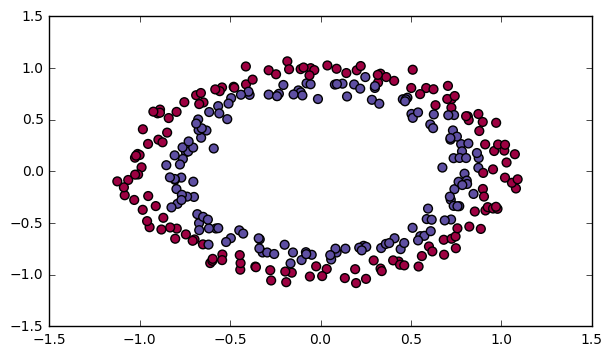

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# load image dataset: blue/red dots in circles
train_X, train_Y, test_X, test_Y = load_dataset()

对数据的理解，train_X, train_Y等数据都是通过init_utils库里的load_dataset()函数构建的，打开内部代码查看
```python
train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=.05)
#在sklearn库里专门有供机器学习的数据集，所以直接加载的，是一个制造圆的平面点，train_X是这些平面点的坐标，train_Y是这些点的颜色，参数说明了有300个训练样本，noise则是对颜色的划分。
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
#这一句话是关于pyplot这个工具画平面图的，里面的参数分别是，点的横坐标，点的纵坐标，c则是对应的颜色，cmap=plt.cm.Spectral则是根据c里的类别选择对应的颜色，这个函数里面可以有参数，则是c里面有多少种类值，就有几种颜色。
#train_X[:, 0]的意思是多少行的第一列，即是所有点的横坐标，后面同理
```

## 1.神经网络模型
将使用一个已经给你实现好的三层神经网络，下面是一些你要去实现的初始化方法：
1. Zeros 实现
2. Random实现，初始化权重使用大量随机值
3. he实现，一篇论文里的权重给的随机值

In [21]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (containing 0 for red dots; 1 for blue dots), of shape (1, number of examples)
    learning_rate -- learning rate for gradient descent 
    num_iterations -- number of iterations to run gradient descent
    print_cost -- if True, print the cost every 1000 iterations
    initialization -- flag to choose which initialization to use ("zeros","random" or "he")
    
    Returns:
    parameters -- parameters learnt by the model
    """
        
    grads = {}
    costs = [] # to keep track of the loss
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 10, 5, 1]
    
    # Initialize parameters dictionary.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        # Loss
        cost = compute_loss(a3, Y)

        # Backward propagation.
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

## 2. Zero初始化
有两种参数需要初始化：
1. 权重矩阵  $(W^{[1]}, W^{[2]}, W^{[3]}, ..., W^{[L-1]}, W^{[L]})$
2. 偏置向量  $(b^{[1]}, b^{[2]}, b^{[3]}, ..., b^{[L-1]}, b^{[L]})$

练习：实现下面初始化所有参数为0的函数，你将看到后面它效果不是很好，因为失败于“break symmetry”，使用np.zeros((..,..)) 

In [22]:
# GRADED FUNCTION: initialize_parameters_zeros 

def initialize_parameters_zeros(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    parameters = {}
    L = len(layers_dims)            # number of layers in the network
    
    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.zeros((layers_dims[l],layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        ### END CODE HERE ###
    return parameters

In [23]:
parameters = initialize_parameters_zeros([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.  0.  0.]
 [ 0.  0.  0.]]
b1 = [[ 0.]
 [ 0.]]
W2 = [[ 0.  0.]]
b2 = [[ 0.]]


Cost after iteration 0: 0.69314718056
Cost after iteration 1000: 0.69314718056
Cost after iteration 2000: 0.69314718056
Cost after iteration 3000: 0.69314718056
Cost after iteration 4000: 0.69314718056
Cost after iteration 5000: 0.69314718056
Cost after iteration 6000: 0.69314718056
Cost after iteration 7000: 0.69314718056
Cost after iteration 8000: 0.69314718056
Cost after iteration 9000: 0.69314718056
Cost after iteration 10000: 0.69314718056
Cost after iteration 11000: 0.69314718056
Cost after iteration 12000: 0.69314718056
Cost after iteration 13000: 0.69314718056
Cost after iteration 14000: 0.69314718056


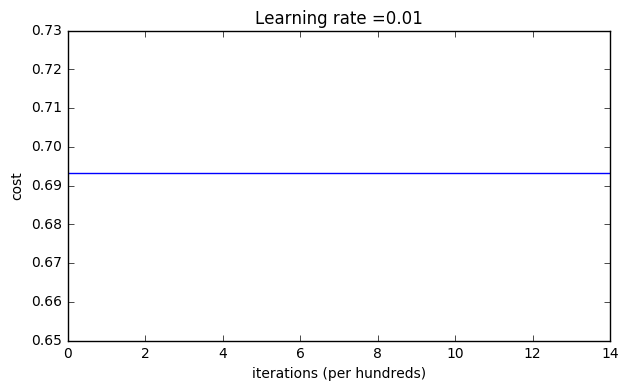

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [24]:
#使用下列代码来训练模型，1500次迭代，并且使用0初始化
parameters = model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

zero初始化的性能实在差，并且cost代价函数并没有减小，该算法的性能不比随机猜测好。为什么？让我们看看预测和决策边界的细节：

In [25]:
print ("predictions_train = " + str(predictions_train))
print ("predictions_test = " + str(predictions_test))

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


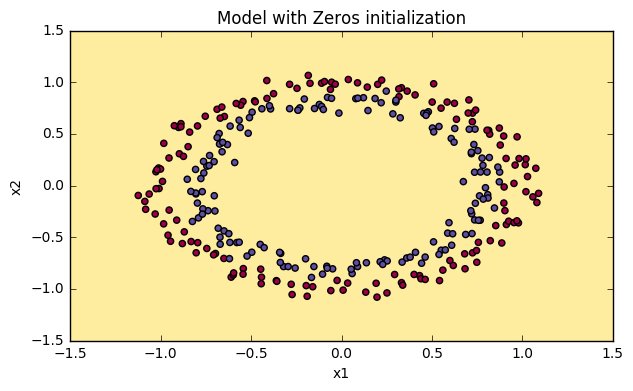

In [26]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

这个模型预测出来结果全是0对于任何一个样本。
大体上，把所有权重都初始化为0导致网络不能打破对称性，这意味着每一层里的每一个神经元都在做一样的事情，并且你就相当于训练一个神经网络每一层都只有一个神经单元，这个网络还不如一个线性分类器例如逻辑回归的效果好。

你应该记住：
权重 $W^{[l]}$应该被随机初始化来打破对称性，但是把$b^{[l]}$参数设置为0就是ok的，只要$W^{[l]}$被随机初始化了，对称性就被打破了。

## 3 随机初始化
为了打破对称性，我们随机初始化权重。每一个神经元都可以为他们的输入学习一个不同的函数，在这节联系中，你可以看到如果权重随机初始化会发生什么，但是这里的随机初始化是初始化为很大的值。

练习：使用 np.random.randn(..,..) * 10来把W参数随机初始化为很大的值，使用np.zeros((.., ..)) 来把b参数初始化为0。我们使用np.random.seed(..) 一个固定的数，来保证随机也是固定的随机，达到不用担心在运行很多次代码会给参数随机一样的值。
seed( ) 用于指定随机数生成时所用算法开始的整数值，如果使用相同的seed( )值，则每次生成的随即数都相同，如果不设置这个值，则系统根据时间来自己选择这个值，此时每次生成的随机数因时间差异而不同。

In [27]:
# GRADED FUNCTION: initialize_parameters_random

def initialize_parameters_random(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)               # This seed makes sure your "random" numbers will be the as ours
    parameters = {}
    L = len(layers_dims)            # integer representing the number of layers
    
    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1])*10
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        ### END CODE HERE ###

    return parameters

In [28]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[ 0.]
 [ 0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[ 0.]]


Cost after iteration 0: inf
Cost after iteration 1000: 0.62477798459
Cost after iteration 2000: 0.598019937185
Cost after iteration 3000: 0.563749747403
Cost after iteration 4000: 0.550118442456
Cost after iteration 5000: 0.54437353565
Cost after iteration 6000: 0.537379655089
Cost after iteration 7000: 0.471135311175
Cost after iteration 8000: 0.397695649
Cost after iteration 9000: 0.393454628374
Cost after iteration 10000: 0.392017685446
Cost after iteration 11000: 0.389177187891
Cost after iteration 12000: 0.386127104932
Cost after iteration 13000: 0.384983267888
Cost after iteration 14000: 0.382758279228


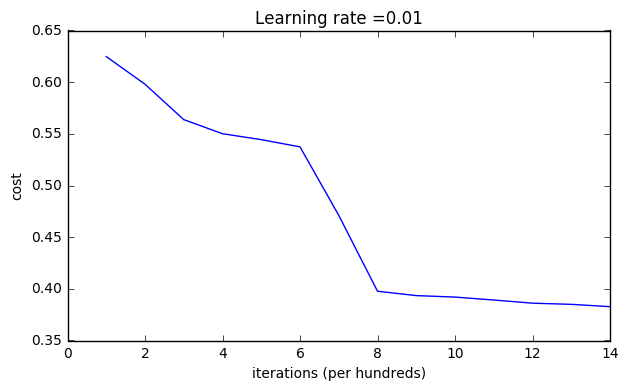

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


In [29]:
#运行下面代码来训练你的模型
parameters = model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

如果你看到“inf”当cost值在迭代第0次的时候，这是因为数值舍入，更复杂的实施将解决这个数值。但这不值得为我们的目的而担心。不管怎样，看起来你打破了对称，这会带来更好的结果比起之前的0初始化。该模型不再是输出全0。

In [30]:
print (predictions_train)
print (predictions_test)

[[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1
  1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0
  0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1
  1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0
  1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1
  0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1
  0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1
  1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1
  1 1 1 0]]
[[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1
  1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


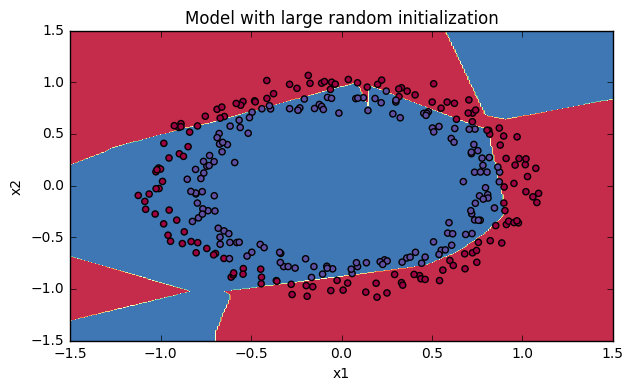

In [31]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

观察：
1. cost成本开始时候非常高，这是因为使用了比较大的权重初始值，最后的激活函数sigmoid输出结果对于一些样本都非常靠近0或者1，并且当这个结果出错时，就会导致非常高的损失，即loss， 的确当$\log(a^{[3]}) = \log(0)$，即log里面很接近0时，loss将无限大。
2. 不好的初始化会导致梯度消失或者梯度爆炸，这回减慢优化算法。
3. 如果你训练这个网络时间长一点，会看到更好的结果，但是使用较大的随机权重初始化会使优化过程变得很慢。

总结：
随机初始化权重为很大的值使得神经网络的效果不是那么好，相反，随机初始化为很小的值就会使效果好一点，问题来了，多小的随机值呢，看下一节


## 4 he初始化
最后尝试一下he初始化，这是根据一个论文的作者来命名的，如果你之前听说过Xavier初始化，he初始化跟它是很相似的，不同点在于Xavier初始化使用的因子是$W^{[l]}$ of `sqrt(1./layers_dims[l-1])` 而he用的是`sqrt(2./layers_dims[l-1])`

提示：这里要实现的和前面的随机初始化很像，唯一不同的就是不再是随机值乘以10，而是乘以 $\sqrt{\frac{2}{\text{dimension of the previous layer}}}$，这是he初始化推荐值对于那些使用了ReLU激活函数的层。

In [41]:
# GRADED FUNCTION: initialize_parameters_he

def initialize_parameters_he(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 # integer representing the number of layers
     
    for l in range(1, L + 1):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1])*np.sqrt(2.0/layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        ### END CODE HERE ###
        
    return parameters

In [42]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[ 0.]]


Cost after iteration 0: 0.883053746342
Cost after iteration 1000: 0.687982591973
Cost after iteration 2000: 0.675128626452
Cost after iteration 3000: 0.652611776889
Cost after iteration 4000: 0.608295897057
Cost after iteration 5000: 0.530494449172
Cost after iteration 6000: 0.413864581707
Cost after iteration 7000: 0.311780346484
Cost after iteration 8000: 0.236962153303
Cost after iteration 9000: 0.185972872092
Cost after iteration 10000: 0.150155562804
Cost after iteration 11000: 0.123250792923
Cost after iteration 12000: 0.0991774654653
Cost after iteration 13000: 0.0845705595402
Cost after iteration 14000: 0.0735789596268


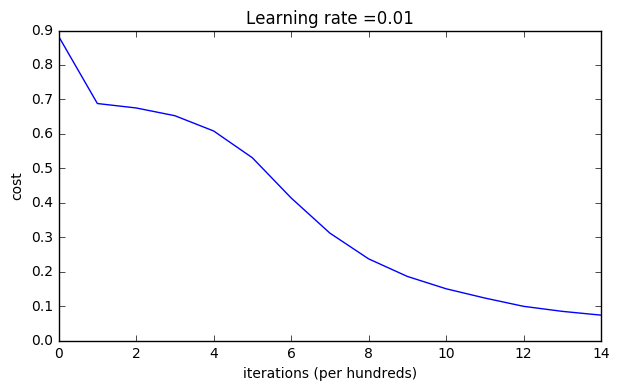

On the train set:
Accuracy: 0.993333333333
On the test set:
Accuracy: 0.96


In [43]:
parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

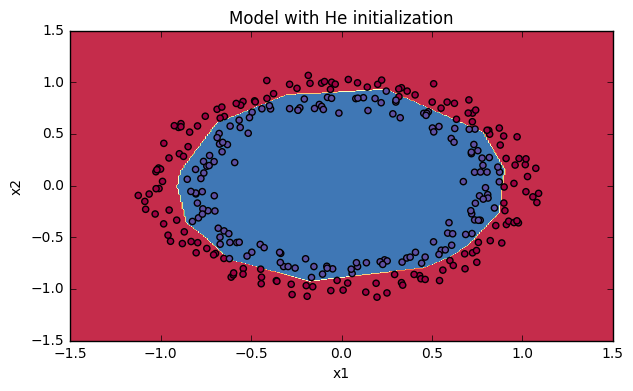

In [44]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

观察：这个使用he初始化方法的模型把蓝点和红点在一个很小的迭代次数内分的非常好。


## 5 总结
你已经看到三种不同的初始化方法了，对于相同的迭代次数以及相同的超参数比较结果如下面表格：

<table> 
    <tr>
        <td>
        **Model**
        </td>
        <td>
        **Train accuracy**
        </td>
        <td>
        **Problem/Comment**
        </td>

    </tr>
        <td>
        3-layer NN with zeros initialization
        </td>
        <td>
        50%
        </td>
        <td>
        fails to break symmetry
        </td>
    <tr>
        <td>
        3-layer NN with large random initialization
        </td>
        <td>
        83%
        </td>
        <td>
        too large weights 
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN with He initialization
        </td>
        <td>
        99%
        </td>
        <td>
        recommended method
        </td>
    </tr>
</table> 


1. 不同的初始化可能就有不同的结果
2. 随机初始化可以打破神经网络的对称性并且保证不同的隐藏单元可以学习不同的内容
3. 不要把初始化值设的太大
4. he初始化效果最好对于神经网络如果使用的ReLU激活函数